In [1]:
import datajoint as dj

In [2]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

Connecting daveliu@mesoscale-activity.datajoint.io:3306


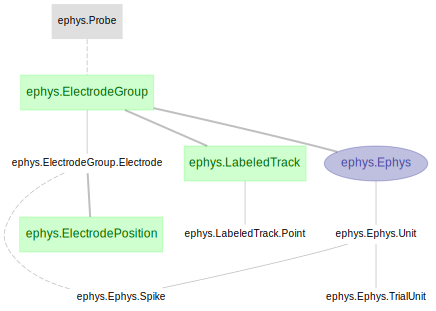

In [3]:
dj.ERD(ephys)

In [4]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((400483,'2017-08-01'))

In [5]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname
daveliu,Dave Liu


In [6]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig2', 'Training rig 2'))
rig

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


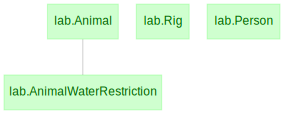

In [7]:
import lab
dj.ERD(lab)

In [8]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
#animalWaterRestriction.insert1((400483, 'dl8'))
animalWaterRestriction

animal Janelia ANM ID (6 digits),water_restriction water restriction number
399752,dl7
400483,dl8


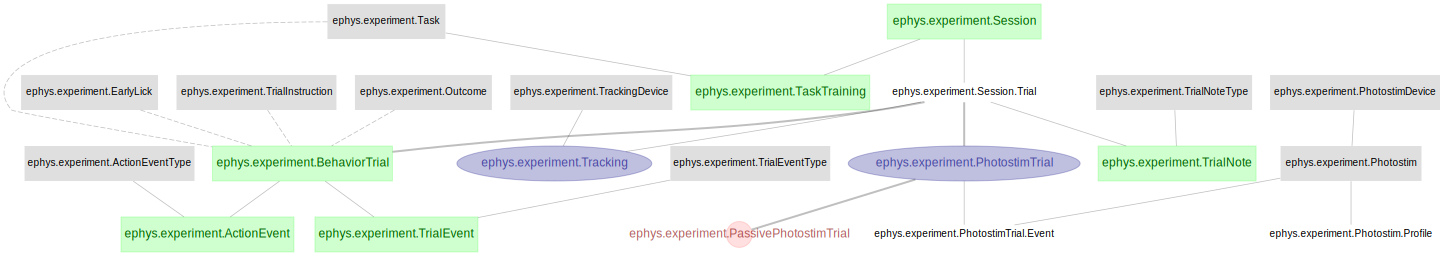

In [9]:
dj.ERD(ephys.experiment)

In [10]:
import ingest
importedSessionFile=ingest.ImportedSessionFile()
importedSessionFileIngest = ingest.ImportedSessionFileIngest()

In [11]:
#importedSessionFile
#importedSessionFile.drop()
importedSessionFileIngest.populate()

In [12]:
importedSessionFile

imported_session_file imported session file
dl8_TW_autoTrain_20171114_145239.mat
dl8_TW_autoTrain_20171114_153113.mat
dl8_TW_autoTrain_20171115_124918.mat
dl8_TW_autoTrain_20171115_133344.mat
dl8_TW_autoTrain_20171116_123401.mat
dl8_TW_autoTrain_20171118_142129.mat
dl8_TW_autoTrain_20171119_122928.mat


In [13]:
importedSessionFileIngest.fetch()

array([('dl8_TW_autoTrain_20171121_130627.mat', 400483, 26),
       ('dl8_TW_autoTrain_20171122_135224.mat', 400483, 27),
       ('dl8_TW_autoTrain_20171122_140137.mat', 400483, 28),
       ('dl8_TW_autoTrain_20171122_143320.mat', 400483, 29),
       ('dl8_TW_autoTrain_20171123_120040.mat', 400483, 30),
       ('dl8_TW_autoTrain_20171123_124648.mat', 400483, 31),
       ('dl8_TW_autoTrain_20171124_121615.mat', 400483, 32),
       ('dl8_TW_autoTrain_20171124_125556.mat', 400483, 33),
       ('dl8_TW_autoTrain_20171125_120334.mat', 400483, 34),
       ('dl8_TW_autoTrain_20171125_124258.mat', 400483, 35),
       ('dl8_TW_autoTrain_20171126_122301.mat', 400483, 36),
       ('dl8_TW_autoTrain_20171127_131224.mat', 400483, 37),
       ('dl8_TW_autoTrain_20171128_125037.mat', 400483, 38),
       ('dl8_TW_autoTrain_20171129_134812.mat', 400483, 39),
       ('dl8_TW_autoTrain_20171129_142619.mat', 400483, 40),
       ('dl8_TW_autoTrain_20171130_124511.mat', 400483, 41),
       ('dl8_TW_autoTrai

In [14]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig,behavior_file the behavior file name
399752,1,2017-11-14,daveliu,TRig1,dl7_TW_autoTrain_20171114_144434.mat
399752,2,2017-11-16,daveliu,TRig1,dl7_TW_autoTrain_20171116_123237.mat
399752,3,2017-11-18,daveliu,TRig1,dl7_TW_autoTrain_20171118_141139.mat
399752,4,2017-11-19,daveliu,TRig1,dl7_TW_autoTrain_20171119_122727.mat
399752,5,2017-11-19,daveliu,TRig1,dl7_TW_autoTrain_20171119_130846.mat
399752,6,2017-11-20,daveliu,TRig1,dl7_TW_autoTrain_20171120_132218.mat
399752,7,2017-11-21,daveliu,TRig1,dl7_TW_autoTrain_20171121_130431.mat


NameError: name 'behaviorTrial' is not defined

In [16]:
trialNote = ephys.experiment.TrialNote()

In [17]:
import numpy as np

In [18]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [19]:
outcome = (behaviorTrial & 'animal = 400483').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'animal = 400483').fetch('early_lick', order_by='session')

In [28]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))
data2 = np.zeros(len(outcome))

In [29]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1
data2[outcome=='ignore'] = 1

In [22]:
trial_note = (trialNote & 'animal = 400483').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [23]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

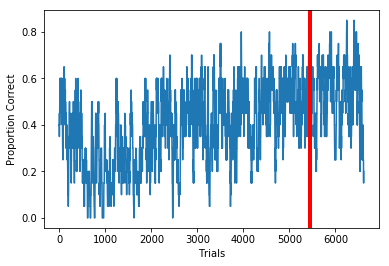

In [26]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('dl8Training.png')

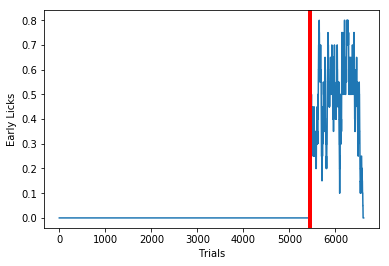

In [25]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('dl8Training2.png')

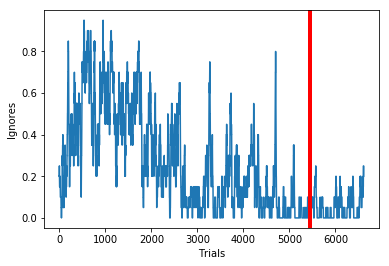

In [31]:
yMA = movingaverage(data2,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Ignores')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('dl8Training3.png')